### Machine Learning Analysis on Thyroid Data


In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
thyroid_data = pd.read_csv('/content/drive/MyDrive/Proj1_Files_F21/Experiment - 4/datasets/thyroid_data.csv')
print(thyroid_data.columns)

Index(['T3_resin', 'Serum_thyroxin', 'Serum_triiodothyronine', 'Basal_TSH',
       'Abs_diff_TSH', 'Outcome'],
      dtype='object')


In [5]:
thyroid_data.shape

(215, 6)

In [6]:
thyroid_data.head()

,T3_resin,Serum_thyroxin,Serum_triiodothyronine,Basal_TSH,Abs_diff_TSH,Outcome
0,107,10.1,2.2,0.9,2.7,1
1,113,9.9,3.1,2.0,5.9,1
2,127,12.9,2.4,1.4,0.6,1
3,109,5.3,1.6,1.4,1.5,1
4,105,7.3,1.5,1.5,-0.1,1


In [7]:
thyroid_data.groupby('Outcome').size()

Outcome
1    150
2     35
3     30
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f06a62b0a50>,
      dtype=object)

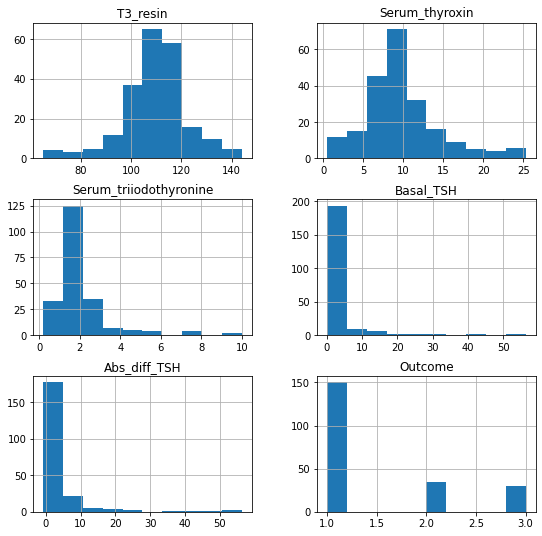

In [8]:
thyroid_data.hist(figsize=(9, 9))

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


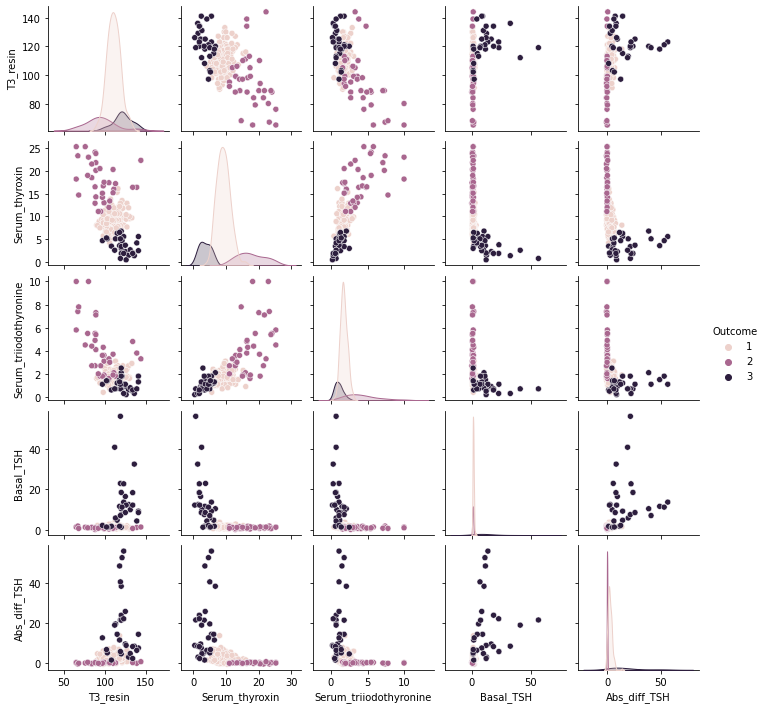

In [17]:
sns.pairplot(data=thyroid_data, hue="Outcome", size=2)

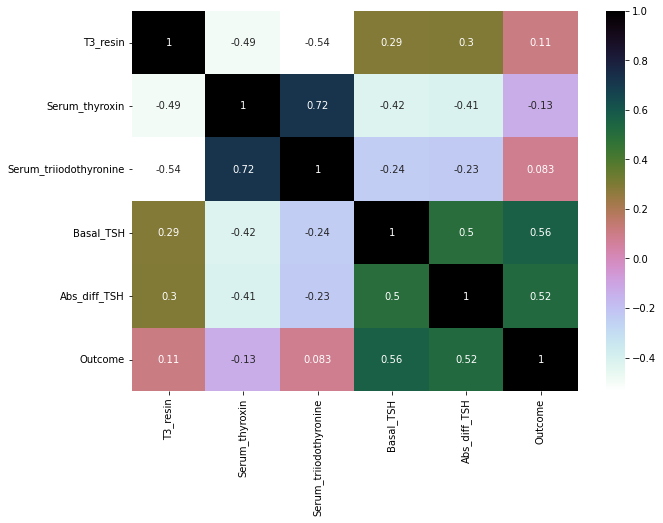

In [18]:
# Plot heatmap which shows correlations
plt.figure(figsize=(10,7)) 
sns.heatmap(thyroid_data.corr(), annot=True, cmap='cubehelix_r')
plt.show()

In [9]:
thyroid_data.isnull().sum()

T3_resin                  0
Serum_thyroxin            0
Serum_triiodothyronine    0
Basal_TSH                 0
Abs_diff_TSH              0
Outcome                   0
dtype: int64

In [10]:
thyroid_data.isna().sum()

T3_resin                  0
Serum_thyroxin            0
Serum_triiodothyronine    0
Basal_TSH                 0
Abs_diff_TSH              0
Outcome                   0
dtype: int64

In [11]:
# Features/Response
feature_names = ['T3_resin', 'Serum_thyroxin', 'Serum_triiodothyronine', 'Basal_TSH', 'Abs_diff_TSH']
X = thyroid_data[feature_names]
y = thyroid_data.Outcome

In [12]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB


In [13]:
# Initial model selection process
models = []

models.append(('KNN', KNeighborsClassifier()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('GNB', GaussianNB()))
models.append(("BNB", BernoulliNB()))

In [14]:
strat_k_fold = StratifiedKFold(n_splits=10, random_state=10)

names = []
scores = []

for name, model in models:
    
    score = cross_val_score(model, X, y, cv=strat_k_fold, scoring='accuracy').mean()
    names.append(name)
    scores.append(score)

kf_cross_val = pd.DataFrame({'Name': names, 'Score': scores})
print(kf_cross_val)

  Name     Score
0  KNN  0.925758
1   DT  0.948701
2  GNB  0.967749
3  BNB  0.734848


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


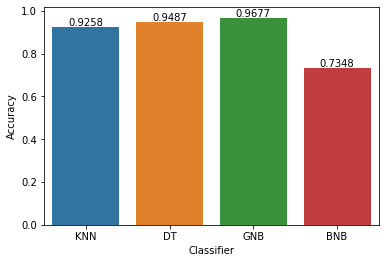

In [15]:
axis = sns.barplot(x = 'Name', y = 'Score', data = kf_cross_val)
axis.set(xlabel='Classifier', ylabel='Accuracy')

for p in axis.patches:
    height = p.get_height()
    axis.text(p.get_x() + p.get_width()/2, height + 0.005, '{:1.4f}'.format(height), ha="center") 
    
plt.show()